In [2]:
import os 
import cv2
import numpy as np

# Reading Input Images

In [3]:
images = []
labels = []
trial = []

## Image Augmentation

### Daisy Inputs

In [ ]:
for img in os.listdir('/home/wintermute/Downloads/flowers/daisy/') :
    label = 0
    path = os.path.join('/home/wintermute/Downloads/flowers/daisy/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

### Dandelion Inputs

In [5]:
for img in os.listdir('/home/wintermute/Downloads/flowers/dandelion/') :
    label = 1
    path = os.path.join('/home/wintermute/Downloads/flowers/dandelion/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

### Rose Inputs

In [6]:
for img in os.listdir('/home/wintermute/Downloads/flowers/rose/') :
    label = 2
    path = os.path.join('/home/wintermute/Downloads/flowers/rose/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

### Sunflower Inputs

In [7]:
for img in os.listdir('/home/wintermute/Downloads/flowers/sunflower/') :
    label = 3
    path = os.path.join('/home/wintermute/Downloads/flowers/sunflower/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

### Tulip Inputs

In [8]:
for img in os.listdir('/home/wintermute/Downloads/flowers/tulip/') :
    label = 4
    path = os.path.join('/home/wintermute/Downloads/flowers/tulip/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [9]:
print(len(images))
print(len(labels))

8634
8634


In [10]:
images = np.array(images)

# Visualizing Image 

In [11]:
import matplotlib.pyplot as plt

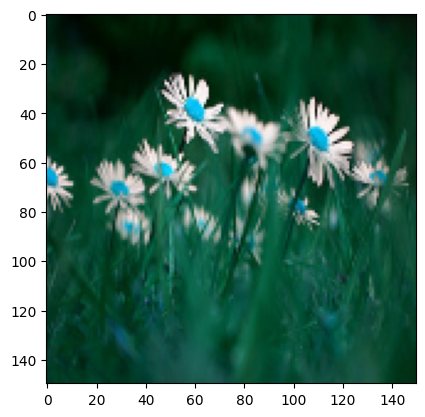

In [12]:
plt.imshow(images[6])
plt.show()

# Data Preparation

In [13]:
from sklearn.model_selection import *
import keras

2022-10-03 12:57:10.016905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 12:57:11.122756: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-03 12:57:14.551792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/wintermute/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-03 12:57:14.552228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.

In [14]:
labels = keras.utils.to_categorical(labels,num_classes = 5)

In [15]:
print(labels)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [16]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size = 0.2,random_state = 42)

In [17]:
x_train.shape

(6907, 150, 150, 3)

In [18]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.optimizers import Adam
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

In [20]:
model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=x_train.shape[1:]))
model.add(LeakyReLU(alpha=0.02))
    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.02))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(GlobalMaxPooling2D())
    
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.02))
model.add(Dropout(0.5)) 

model.add(Dense(5))
model.add(Activation('softmax'))

2022-10-03 12:57:30.868525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 12:57:30.998271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 12:57:30.999508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 12:57:31.003081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val))

2022-10-03 12:57:42.446183: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 396225000 exceeds 10% of free system memory.
2022-10-03 12:57:43.224683: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 396225000 exceeds 10% of free system memory.


Epoch 1/25


2022-10-03 12:57:52.783676: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-10-03 12:57:55.865772: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


184/184 [==============================] - 53s 203ms/step - loss: 5.4625 - accuracy: 0.4342 - val_loss: 1.0550 - val_accuracy: 0.6316
Epoch 2/25
184/184 [==============================] - 36s 197ms/step - loss: 1.0916 - accuracy: 0.5644 - val_loss: 0.9466 - val_accuracy: 0.6577
Epoch 3/25
184/184 [==============================] - 41s 222ms/step - loss: 1.0087 - accuracy: 0.6060 - val_loss: 0.9776 - val_accuracy: 0.6528
Epoch 4/25
184/184 [==============================] - 41s 222ms/step - loss: 0.9426 - accuracy: 0.6390 - val_loss: 0.8582 - val_accuracy: 0.6818
Epoch 5/25
184/184 [==============================] - 44s 241ms/step - loss: 0.9008 - accuracy: 0.6508 - val_loss: 0.8867 - val_accuracy: 0.6606
Epoch 6/25
184/184 [==============================] - 63s 342ms/step - loss: 0.8671 - accuracy: 0.6681 - val_loss: 0.8365 - val_accuracy: 0.6644
Epoch 7/25
184/184 [==============================] - 82s 445ms/step - loss: 0.8294 - accuracy: 0.6794 - val_loss: 0.7286 - val_accuracy: 0.7

In [24]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100))

54/54 [==============================] - 6s 103ms/step - loss: 0.6752 - accuracy: 0.7678
Test Accuracy: 76.78%


In [25]:
model.save_weights('Assignment_3_Final_Weights.h5')

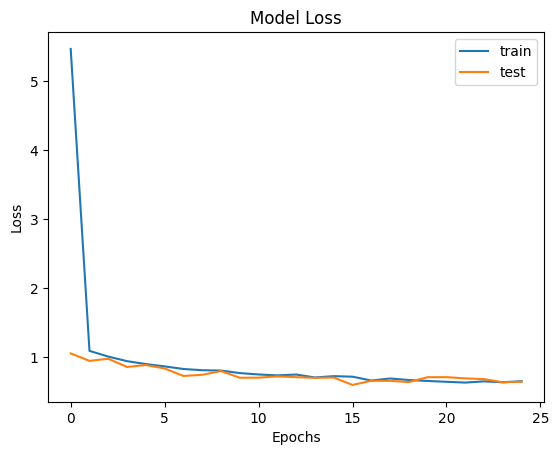

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

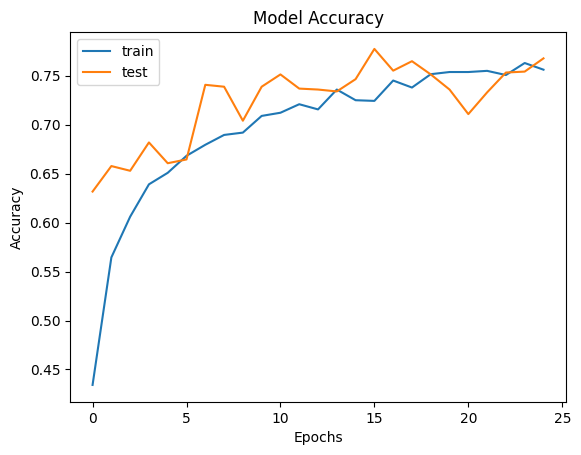

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()